In [22]:
import pandas as pd

# Cargar el archivo Excel
file_path = ('./consumo/CONSUMO-HIDROCARBUROS-2024-2025.xlsx')
xls = pd.ExcelFile(file_path)


df = xls.parse('CONSUMO', skiprows=6)


df_gas = df[['Fecha', 'Gasolina regular', 'Gasolina superior']].copy()


df_gas = df_gas[pd.to_datetime(df_gas['Fecha'], errors='coerce').notna()]
df_gas['Fecha'] = pd.to_datetime(df_gas['Fecha'])

# Visualizar los primeros datos
df_gas.head()


,Fecha,Gasolina regular,Gasolina superior
0,2000-01-01,202645.20,308156.82
1,2000-02-01,205530.96,307766.31
2,2000-03-01,229499.56,331910.29
3,2000-04-01,210680.40,315648.08
4,2000-05-01,208164.34,319667.97


In [21]:

serie_regular = df_gas[['Fecha', 'Gasolina regular']].copy().set_index('Fecha')
serie_superior = df_gas[['Fecha', 'Gasolina superior']].copy().set_index('Fecha')


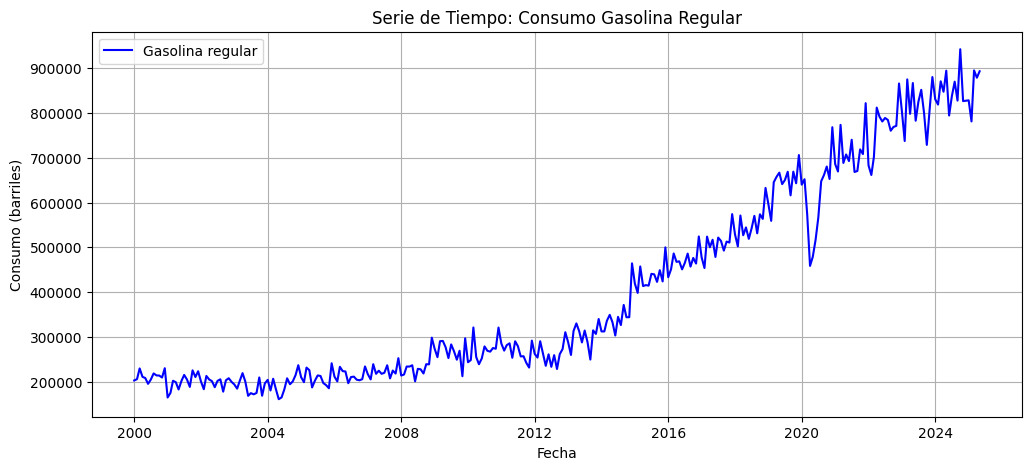

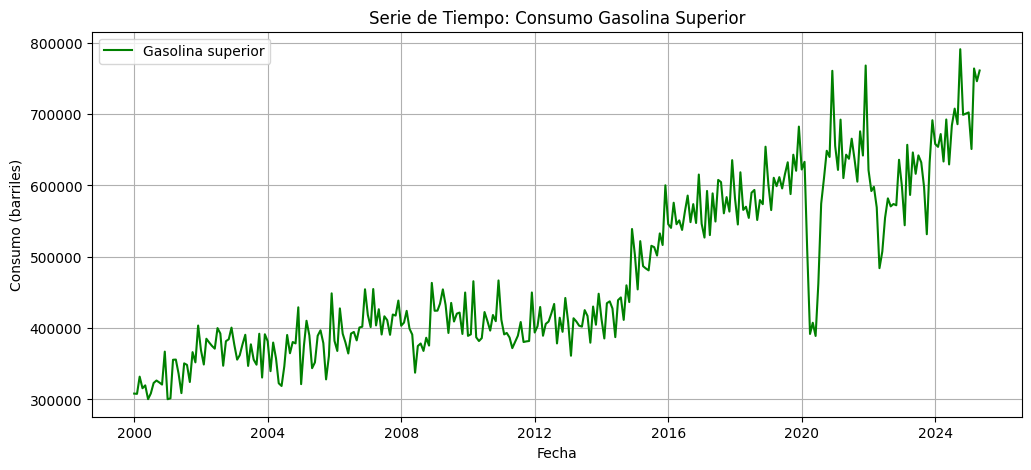

In [17]:
import matplotlib.pyplot as plt

# Graficar gasolina regular
plt.figure(figsize=(12, 5))
plt.plot(serie_regular, label='Gasolina regular', color='blue')
plt.title('Serie de Tiempo: Consumo Gasolina Regular')
plt.xlabel('Fecha')
plt.ylabel('Consumo (barriles)')
plt.grid(True)
plt.legend()
plt.show()

# Graficar gasolina superior
plt.figure(figsize=(12, 5))
plt.plot(serie_superior, label='Gasolina superior', color='green')
plt.title('Serie de Tiempo: Consumo Gasolina Superior')
plt.xlabel('Fecha')
plt.ylabel('Consumo (barriles)')
plt.grid(True)
plt.legend()
plt.show()


In [18]:
from statsmodels.tsa.stattools import adfuller

# --- Regular ---
resultado_regular = adfuller(serie_regular['Gasolina regular'].dropna())
print("ADF - Gasolina regular")
print(f"Estadístico ADF: {resultado_regular[0]}")
print(f"p-value: {resultado_regular[1]}")
if resultado_regular[1] < 0.05:
    print(" La serie ES estacionaria en media.")
else:
    print("❌ La serie NO es estacionaria en media.")

# --- Superior ---
resultado_superior = adfuller(serie_superior['Gasolina superior'].dropna())
print("\nADF - Gasolina superior")
print(f"Estadístico ADF: {resultado_superior[0]}")
print(f"p-value: {resultado_superior[1]}")
if resultado_superior[1] < 0.05:
    print(" La serie ES estacionaria en media.")
else:
    print("❌ La serie NO es estacionaria en media.")


ADF - Gasolina regular
Estadístico ADF: 2.5550976170856887
p-value: 0.9990654906073354
❌ La serie NO es estacionaria en media.

ADF - Gasolina superior
Estadístico ADF: 0.07592641160886357
p-value: 0.964378519895292
❌ La serie NO es estacionaria en media.


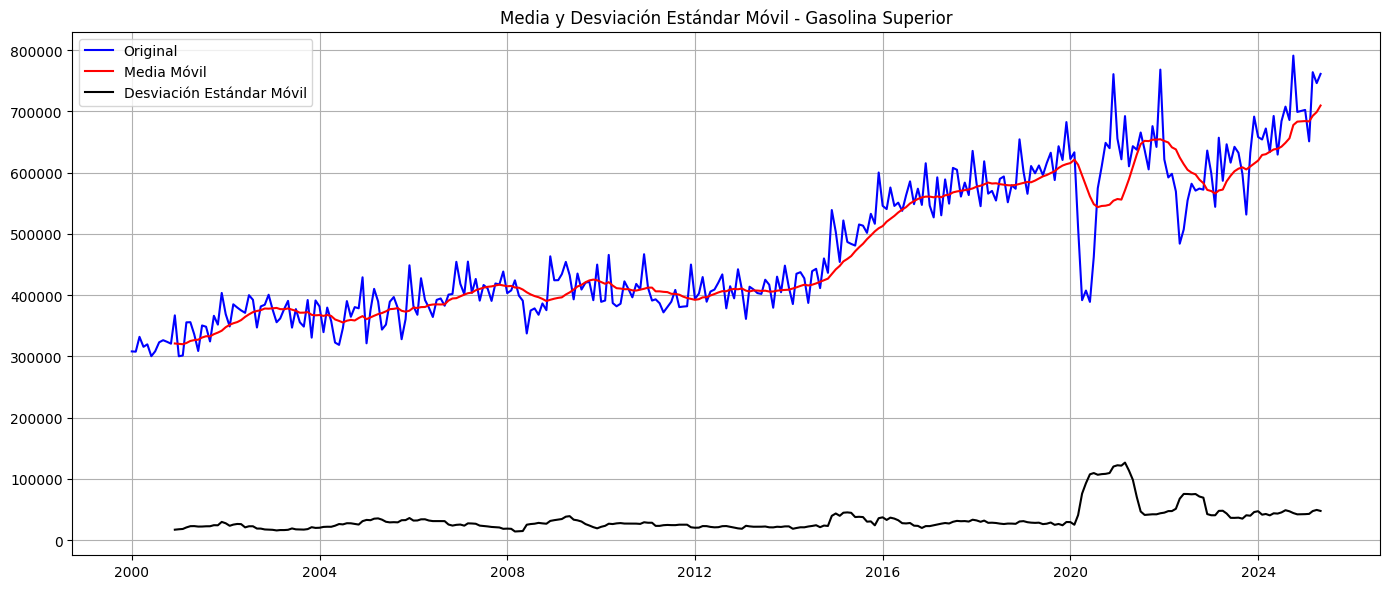

In [23]:
# Calcular media móvil y desviación estándar móvil para Gasolina Superior
mediaMovil_superior = serie_superior['Gasolina superior'].rolling(window=12).mean()
desvMovil_superior = serie_superior['Gasolina superior'].rolling(window=12).std()

# Gráfico para Gasolina Superior
plt.figure(figsize=(14, 6))
plt.plot(serie_superior['Gasolina superior'], color='blue', label='Original')
plt.plot(mediaMovil_superior, color='red', label='Media Móvil')
plt.plot(desvMovil_superior, color='black', label='Desviación Estándar Móvil')
plt.title('Media y Desviación Estándar Móvil - Gasolina Superior')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


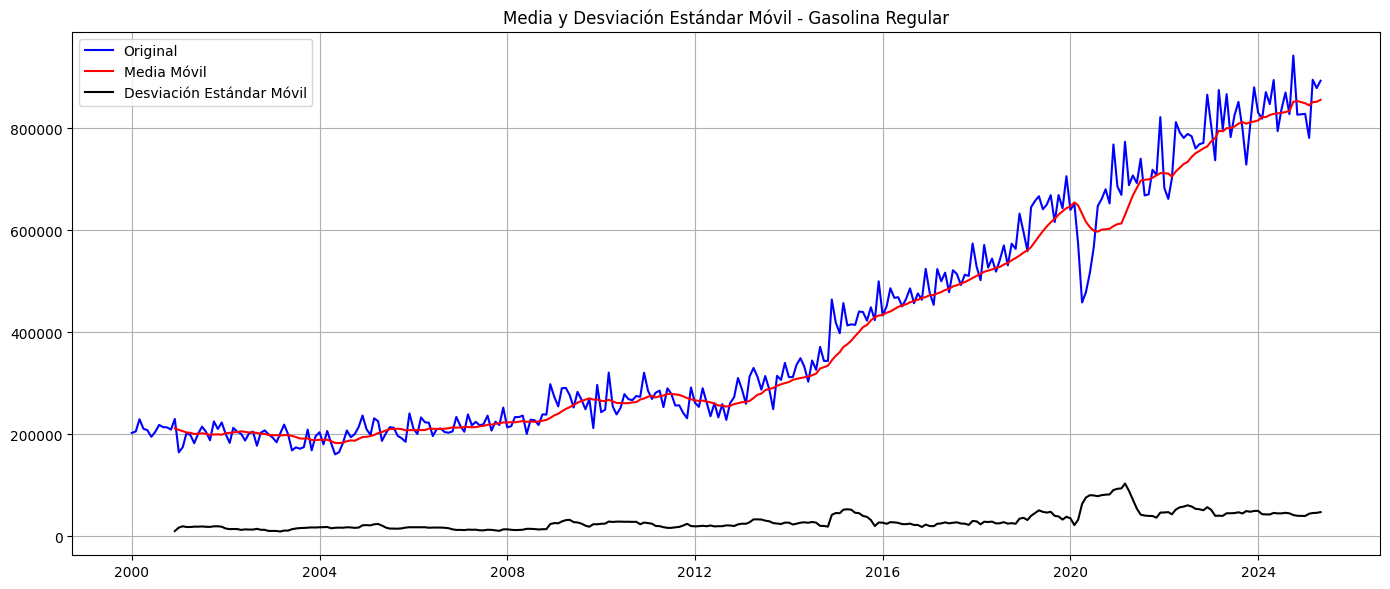

In [20]:
# Calcular media móvil y desviación estándar móvil (ventana de 12 meses)
mediaMovil_regular = serie_regular['Gasolina regular'].rolling(window=12).mean()
desvMovil_regular = serie_regular['Gasolina regular'].rolling(window=12).std()

# Gráfico
plt.figure(figsize=(14, 6))
plt.plot(serie_regular['Gasolina regular'], color='blue', label='Original')
plt.plot(mediaMovil_regular, color='red', label='Media Móvil')
plt.plot(desvMovil_regular, color='black', label='Desviación Estándar Móvil')
plt.title('Media y Desviación Estándar Móvil - Gasolina Regular')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()
